## 2. Overview of classification methods

Many of the method implement discriminative learning of linear classifiers under convex loss functions.

* **Nearest Neighbors classifier**

http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification



* **Logistic Regression**

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



* **Neural networks**:
    - Simplest example - Perceptron is very similar to logistic regression  http://scikit-learn.org/stable/modules/linear_model.html#perceptron
   


* **Linear and Quadratic Discriminant Analysis**
http://scikit-learn.org/stable/modules/lda_qda.html

    - Advantage: closed-form solution, no hyperparameters, can extend to multiclass classification.

    - Disadvantage: assumptions about distibutions: Gaussian


* **Support Vector Machines** - SVM Classifier: SVC http://scikit-learn.org/stable/modules/svm.html#classification

    Optimize a hinge loss functions that defines the width of the decision boundary separating the classes. Support vectors are the examples from two classes closest to the boundary. The larger the boundary - the better. 
    Advantages include linear and nonlinear options with different kernels. Disadvantage is compuational complexity, does not scale well.
    

* A generalized version of linear classifiers **Stochastic Gradient Descent**:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
SGDC has a choice of loss functions: hinge (as in SVM), log (as in logistic regression), ... and supports regularization.
SGDC updates by calculating the gradient for each example separately, so it can be trained on very large datasets: out-of-core training with .partial_fit().


* **Decision tree**
http://scikit-learn.org/stable/modules/tree.html#classification


* **Ensemble methods**:

    - **Gradient Boosting** approach  http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

    - Bagging approaches:

        - **Voting**
        http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

        - **RandomForest**
        http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


* **Naive Bayes** classifier:
http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

    NB Can be extended to multiclass probelems. Can handle out-of-core training on large datasets easily.


* For time series there exist different methods, like **Gaussian process** classifier:
http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc


Import basic packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text formatting class for readability of print outputs

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Function to load file as a numpy array:

In [3]:
# load a single txt file as a numpy array
def load_file(filepath):
    df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

Load training data and print data shape

In [4]:
train_sub_map = load_file("~/Desktop/UCI HAR Dataset/train/subject_train.txt")
trainX = load_file("~/Desktop/UCI HAR Dataset/train/X_train.txt")
trainy = load_file("~/Desktop/UCI HAR Dataset/train/y_train.txt")
print(train_sub_map.shape)
print(trainX.shape)
print(trainy.shape)

(7352, 1)
(7352, 561)
(7352, 1)


Load test data and print data shape

In [5]:
test_sub_map = load_file("~/Desktop/UCI HAR Dataset/test/subject_test.txt")
testX = load_file("~/Desktop/UCI HAR Dataset/test/X_test.txt")
testy = load_file("~/Desktop/UCI HAR Dataset/test/y_test.txt")
print(test_sub_map.shape)
print(testX.shape)
print(testy.shape)

(2947, 1)
(2947, 561)
(2947, 1)


Need to use ravel for the y data to get it as a 1D array

In [6]:
print(type(trainy))
print(trainy.ravel().shape)

<class 'numpy.ndarray'>
(7352,)


#### Precision (Positive predictive value)
Out of all predicted positive, how many are actually positive?
$$Precision = \frac{TP}{TP + FP}$$

#### True positive rate, also Sensitivity or Recall
Out of all actual positive cases, how many do we predict as positive?
$$ TPR = Sensitivity = Recall = \frac{TP}{TP + FN} $$

#### F score ($F_1$ score, F-measure)

F score is a combination of precision and recall:

$$F_1 = \frac{2TP}{2TP + FP + FN}$$

Tested logistic regression model on the data

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# instantiate logistic regression
# pass default solver 'lbfgs', large # of max iteration, and auto multi-class
lr = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='auto')
# fit the model to the training data
lr.fit(trainX, trainy.ravel())

# predict train y values and test y values
lr_train_pred_y = lr.predict(trainX)
lr_test_pred_y = lr.predict(testX)

# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on lr_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), lr_train_pred_y))
print(color.BOLD + 'Classification report on lr_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), lr_test_pred_y))

Classification report on lr_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.98      0.98      0.98      1286
           5       0.98      0.98      0.98      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352

Classification report on lr_test_pred_y:
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.97      0.94      0.96       471
           3       0.99      0.97      0.98       420
           4       0.98      0.88      0.93       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00      

Tested K nearest neighbors classifier on data

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7)
# fit the model to the training data
knn.fit(trainX, trainy.ravel())

# predict train y values and test y values
knn_train_pred_y = knn.predict(trainX)
knn_test_pred_y = knn.predict(testX)

# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on knn_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), knn_train_pred_y))
print(color.BOLD + 'Classification report on knn_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), knn_test_pred_y))

Classification report on knn_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      0.99      1.00       986
           4       0.97      0.93      0.95      1286
           5       0.94      0.97      0.96      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.98      7352
   macro avg       0.98      0.98      0.98      7352
weighted avg       0.98      0.98      0.98      7352

Classification report on knn_test_pred_y:
              precision    recall  f1-score   support

           1       0.84      0.97      0.90       496
           2       0.90      0.90      0.90       471
           3       0.95      0.79      0.86       420
           4       0.91      0.80      0.85       491
           5       0.84      0.93      0.89       532
           6       1.00      0.99      1.00    

One vs rest classifier

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
trainy_bin = label_binarize(trainy, classes=[1,2,3,4,5,6])
testy_bin = label_binarize(testy, classes=[1,2,3,4,5,6])
# now we have one binary column for each class instead of one column with many class names

# instantiate one vs rest classifier
ovr = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
# Learn to predict each class against the other
y_score = ovr.fit(trainX, trainy_bin).decision_function(testX)

Just to check shape of binarized y values for train and test datasets

In [10]:
print(trainy_bin.shape[1])
print(testy_bin.shape[1])

6
6


Evaluate one vs rest classifier with ROC curve and precision-recall curve

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# get number of unique classes
n_classes = trainy_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

precision = {}
recall = {}
pr_auc = {}

# we calculate 10 curves, one for each class
for i in range(n_classes):
    # ROC:
    fpr[i], tpr[i], _ = roc_curve(testy_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Precision-recall:
    precision[i], recall[i], _ = precision_recall_curve(testy_bin[:, i], y_score[:, i])
    pr_auc[i] = average_precision_score(testy_bin[:, i], y_score[:, i])

ROC curve for activity #0 (walking)

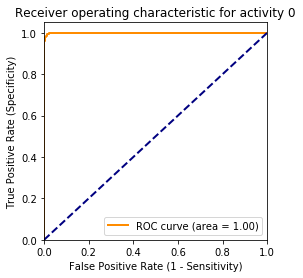

In [12]:
activity = 0

plt.figure(figsize=(4,4))
plt.plot(fpr[activity], tpr[activity], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[activity])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Sensitivity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.title('Receiver operating characteristic for activity ' + str(activity))
plt.legend(loc="lower right")
plt.show()

Precision-recall curve for activity #0 (walking)

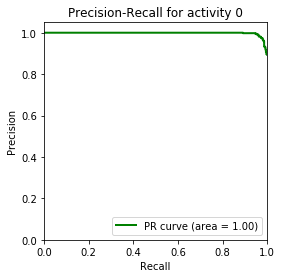

In [13]:
# Plot only one Precision-Recall curve for selected class
activity = 0

plt.figure(figsize=(4,4))
plt.plot(recall[activity], precision[activity], color='green',
         lw=2, label='PR curve (area = %0.2f)' % pr_auc[activity])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for activity ' + str(activity))
plt.legend(loc="lower right")
plt.show()

One vs rest classifier take 2

In [14]:
# instantiate one vs rest classifier
ovr1 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
# Learn to predict each class against the other
ovr1.fit(trainX, trainy.ravel())

# predict train y values and test y values
ovr1_train_predy = ovr1.predict(trainX)
ovr1_test_predy = ovr1.predict(testX)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testy, ovr1_test_predy)

array([[496,   0,   0,   0,   0,   0],
       [ 19, 451,   1,   0,   0,   0],
       [  3,   5, 412,   0,   0,   0],
       [  0,   4,   0, 427,  59,   1],
       [  1,   0,   0,  11, 520,   0],
       [  0,   0,   0,   0,   0, 537]])

Classification report for one vs rest classifier

In [16]:
# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on ovr1_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), ovr1_train_predy))
print(color.BOLD + 'Classification report on ovr1_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), ovr1_test_predy))

Classification report on ovr1_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.98      0.98      0.98      1286
           5       0.98      0.98      0.98      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352

Classification report on ovr1_test_pred_y:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00  

Although here we have a balanced dataset with approx. equal support for each class, note the micro and macro averaging techniques:

**"macro"** simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.


**"weighted"** accounts for class imbalance by computing the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.


**"micro"** gives each sample-class pair an equal contribution to the overall metric (except as a result of sample-weight). Rather than summing the metric per class, this sums the dividends and divisors that make up the per-class metrics to calculate an overall quotient. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

Multinomial naive bays applied to multiclass problem. Evaluated with stratified K-fold cross-validation

First combine test and train datasets

In [17]:
concat_sub_map = np.concatenate((train_sub_map, test_sub_map), axis=None)
concat_X = np.concatenate((trainX, testX), axis=0)
concat_y = np.concatenate((trainy, testy), axis=None)
print(concat_sub_map.shape)
print(concat_X.shape)
print(concat_y.shape)

(10299,)
(10299, 561)
(10299,)


In [18]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Instantiate k fold cross-validator 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Instantiate RF regressor 
rf = RandomForestRegressor()

Changing min_samples_leaf and min_samples_split doesn't change much. Even changing n_estimators doesn't change much. Changing max_depth changes a lot though.

In [27]:
# Instantiate grid search with 4 hyperparameters 
gscv = GridSearchCV(
    rf, 
    {"max_depth": range(1, 4),
     "n_estimators": range(2, 5), 
     "min_samples_leaf": range(1, 4),
     "min_samples_split": range(2, 5)},
    cv=kf, 
    n_jobs=-1
)
gscv.fit(concat_X, concat_y)

# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)

# Create a heatmap-style table, use df.pivot_table
piv_df = cv_df.pivot_table(index=["param_max_depth", "param_min_samples_leaf"],
           columns=["param_n_estimators", "param_min_samples_split"],
           values="mean_test_score").round(3)
piv_df.style.background_gradient(cmap="nipy_spectral", axis=None)

Changing max_depth (levels of tree) improves classification score more than changing n_estimators (number of trees)

/Users/hayaw/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


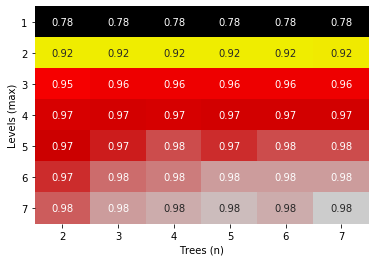

In [30]:
# rf and kf already instantiated

# Instantiate grid search with 2 hyperparameters
gscv1 = GridSearchCV(
    rf, 
    {"max_depth": range(1, 8), "n_estimators": range(2, 8)}, 
    cv=kf, 
    n_jobs=-1
)
gscv1.fit(concat_X, concat_y)

# Get cross-validation data
cv1_df = pd.DataFrame(gscv1.cv_results_)

# Pivot table
pivoted_df = cv1_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)

# Create a heatmap with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivoted_df,
            cmap="nipy_spectral",
            cbar=False,
            annot=True)
plt.xlabel('Trees (n)')
plt.ylabel('Levels (max)')
# plt.xticks(size=14)
plt.yticks(rotation=0);

Gradient boosting regressor seems to be worse than random forest regressor. Need a lot of estimators to get a good model.

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# kf already instantiated

# instantiate gradient boosting regressor 
gbr = GradientBoostingRegressor()

# Instantiate grid search with 2 hyperparameters
gscv2 = GridSearchCV(
    gbr, 
    {"max_depth": range(1, 6), "n_estimators": range(2, 10)}, 
    cv=kf, 
    n_jobs=-1
)
gscv2.fit(concat_X, concat_y)

# Get cross-validation data
cv2_df = pd.DataFrame(gscv2.cv_results_)

# Create a heatmap-style table, use df.pivot bc only 2 hyperparameters
piv_df1 = cv2_df.pivot(index="param_max_depth",
           columns="param_n_estimators",
           values="mean_test_score").round(3)
piv_df1.style.background_gradient("nipy_spectral", axis=None)

param_n_estimators,2,3,4,5,6,7,8,9
param_max_depth,,,,,,,,
1,0.268,0.365,0.444,0.508,0.56,0.603,0.641,0.673
2,0.316,0.431,0.524,0.6,0.662,0.712,0.753,0.786
3,0.328,0.447,0.544,0.623,0.687,0.739,0.781,0.815
4,0.331,0.452,0.55,0.63,0.695,0.747,0.79,0.825
5,0.334,0.455,0.554,0.634,0.699,0.752,0.795,0.83


Find best hyperparameters (number of neighbors) for the KNN classifier. Turns out the optimal number of neighbors is 3 and it provides a classification accuracy of 97%

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score

X = concat_X
y = concat_y

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
# print(len(tuple(sss.split(X, y))))
train_index, test_index = tuple(sss.split(X, y))[0]
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

knn = KNeighborsClassifier()

# (Hyper)parameter grid
p_grid = {
    "n_neighbors": [3, 5, 7, 9]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
g = GridSearchCV(knn, p_grid, cv=cv)

g.fit(X, y)
best = g.best_params_
cv = g.cv_results_

print('GridSearch found optimal number of neighbors:', best['n_neighbors'])
print('Mean CV test scores are:', cv['mean_test_score'])

knn = KNeighborsClassifier(n_neighbors = best['n_neighbors']) 
knn.fit(X_train, y_train)

print('Accuracy:', accuracy_score(y_test, knn.predict(X_test)))


GridSearch found optimal number of neighbors: 3
Mean CV test scores are: [0.96922031 0.96727838 0.96601612 0.96387999]
Accuracy: 0.9728155339805825


Try Naive Bayes classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import pprint

# instantiate gradient boosting regressor 
nb = GaussianNB()
# Instantiate statrified k fold cross-validator
cv = StratifiedKFold(n_splits=5)

# evaluate
scores = cross_validate(nb, X, y, cv=cv,
                         scoring=('accuracy', 'f1_micro'),
                         return_train_score=True)

pprint.pprint(scores)
print()
print('mean TRAIN accuracy: ', np.round(scores['train_accuracy'].mean(), 2))
print('mean TEST  accuracy: ', np.round(scores['test_accuracy'].mean(), 2))

{'fit_time': array([0.09751487, 0.09860206, 0.09487414, 0.09613276, 0.09556413]),
 'score_time': array([0.04077411, 0.04102874, 0.04062414, 0.03965902, 0.04088187]),
 'test_accuracy': array([0.73485216, 0.71906841, 0.70422535, 0.75327829, 0.79193   ]),
 'test_f1_micro': array([0.73485216, 0.71906841, 0.70422535, 0.75327829, 0.79193   ]),
 'train_accuracy': array([0.74757164, 0.76584122, 0.76978155, 0.71262136, 0.79046348]),
 'train_f1_micro': array([0.74757164, 0.76584122, 0.76978155, 0.71262136, 0.79046348])}

mean TRAIN accuracy:  0.76
mean TEST  accuracy:  0.74


Try svm one vs rest classifier

In [34]:
# instantiate one vs rest classifier
ovr1 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))

# fit the model to the training data
ovr1.fit(trainX, trainy.ravel())

# predict train y values and test y values
ovr1_train_pred_y = ovr1.predict(trainX)
ovr1_test_pred_y = ovr1.predict(testX)

# evaluate classifier performance on test and train pred_y
print(color.BOLD + 'Classification report on ovr1_train_pred_y:' + color.END)
print(classification_report(trainy.ravel(), ovr1_train_pred_y))
print(color.BOLD + 'Classification report on ovr1_test_pred_y:' + color.END)
print(classification_report(testy.ravel(), ovr1_test_pred_y))

Classification report on ovr1_train_pred_y:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1226
           2       1.00      1.00      1.00      1073
           3       1.00      1.00      1.00       986
           4       0.98      0.98      0.98      1286
           5       0.98      0.98      0.98      1374
           6       1.00      1.00      1.00      1407

    accuracy                           0.99      7352
   macro avg       0.99      0.99      0.99      7352
weighted avg       0.99      0.99      0.99      7352

Classification report on ovr1_test_pred_y:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00  

In [35]:
# Instantiate stratified k fold cross-validator
cv = StratifiedKFold(n_splits=5)

# evaluate
scores = cross_validate(ovr1, X, y, cv=cv,
                         scoring=('accuracy', 'f1_micro'),
                         return_train_score=True)
# show scores
pprint.pprint(scores)
print()
print('mean TRAIN accuracy: ', np.round(scores['train_accuracy'].mean(), 2))
print('mean TEST  accuracy: ', np.round(scores['test_accuracy'].mean(), 2))

{'fit_time': array([49.47737312, 48.44361377, 53.84452987, 52.80243993, 51.48205209]),
 'score_time': array([2.63411403, 2.60353208, 2.89678192, 2.80939507, 2.73885083]),
 'test_accuracy': array([0.95540475, 0.93449782, 0.9839728 , 0.97231666, 0.97228974]),
 'test_f1_micro': array([0.95540475, 0.93449782, 0.9839728 , 0.97231666, 0.97228974]),
 'train_accuracy': array([0.99247207, 0.99150279, 0.99199029, 0.99235437, 0.9930842 ]),
 'train_f1_micro': array([0.99247207, 0.99150279, 0.99199029, 0.99235437, 0.9930842 ])}

mean TRAIN accuracy:  0.99
mean TEST  accuracy:  0.96
